<a href="https://colab.research.google.com/github/JF11579/Colab/blob/main/ML_PieceJason_Kansas_Feature_Imprant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Here I apply Jasons ML book to the KS data but incorporate graphing feature importance.

# To get equation of the line for Linear Regress :

params = model.coef_

Get equation of the line for the KC data using linear rgress.  Feature importance.

then scale the data and see if it is improved.

Then add in  or better make sepearate model adding time series census data such as race and household income, job.

In [8]:
import pandas as pd

In [2]:
# KC housing data
df = pd.read_csv("/content/kc_house_data - kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Linear Regression benefits from scaling the data to btwn 0-1.  Let us run a correlation to see which variables we wshould focus on.

In [11]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront      view  condition     grade  sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat      long  sqft_living15  sqft_lot15
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109  0.018525   -0.002721  0.011592  -0.023783  0.008130   -0.010842      -0.005151  0.021380     -0.016907 -0.008224 -0.001891  0.020799      -0.002901   -0.138798
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661  0.256794    0.266369  0.397293   0.036362  0.667434    0.605567       0.323816  0.054012      0.126434 -0.053203  0.307003  0.021626       0.585379    0.082447
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   -0.006582  0.079532   0.028472  0.356967    0.477600       0.303093  0.154178      0.018841 -0.152668 -0.008931  0.129473       0.391638    0.029244
bathrooms      0.005160  0.525138  0.515884 

Many ML models assume the data is bell ci=uved Gaussain.  We will check the skewness.

# closer to 0 is closer to bell

Positive numbers skew right.

Negative numbers skew Left



In [12]:
skew = df.skew()
print(skew)

# something skew with price which leans heavy right, Sqft Lot, waterfront,yr_renovated

# Maybe look for a model that works well with skewed data.

id                0.243329
price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64


In [16]:
# select our variables
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront','condition','yr_built', 'yr_renovated', 'zipcode','lat','long']]

In [17]:
y= df['price']

##Next we build the linear regression

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)
r2_score = regressor.score(x, y)
print(r2_score*100,'%')

# Score of 65% is below the hope for 85%

64.64486187238411 %


Before we try to improve up on that score let us look at the feature importance.

In [24]:
intercept = regressor.intercept_
features = pd.DataFrame(regressor.coef_ , x.columns, columns=['coefficient'])
features.head(20)

,coefficient
bedrooms,-56076.787015
bathrooms,57545.175132
sqft_living,284.643930
sqft_lot,-0.015685
waterfront,759143.598447
condition,22474.632742
yr_built,-1705.685682
yr_renovated,27.268222
zipcode,-623.402709
lat,681983.889214


Let us loose those Negative signs. but be careful with Long & Lat not being Neg

> Indented block



In [25]:
features.coefficient = features.coefficient.abs()
features.coefficient.head(20)

bedrooms         56076.787015
bathrooms        57545.175132
sqft_living        284.643930
sqft_lot             0.015685
waterfront      759143.598447
condition        22474.632742
yr_built          1705.685682
yr_renovated        27.268222
zipcode            623.402709
lat             681983.889214
long            271858.857096
Name: coefficient, dtype: float64

<BarContainer object of 11 artists>

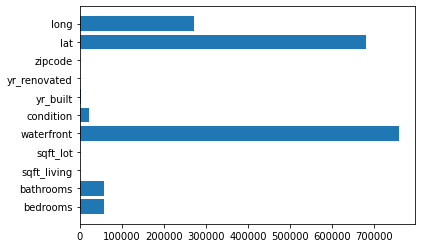

In [26]:
import matplotlib.pyplot as plt
plt.barh(features.index, features.coefficient)

Let us get the equation of the Line:

params = model.coef_

In [29]:
print(regressor.intercept_)

-1225177.4424074106


In [30]:
print(regressor.coef_)

[5.60767870e+04 5.75451751e+04 2.84643930e+02 1.56854308e-02
 7.59143598e+05 2.24746327e+04 1.70568568e+03 2.72682219e+01
 6.23402709e+02 6.81983889e+05 2.71858857e+05]


Now let us scale the data and see if we do any better than our  65% accuracy.